# **Student Exercise Notebook**
In this notebook, you will practice analyzing a dataset and building a Linear Regression model. Follow the instructions provided in each step to complete the exercise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import module as md


In [2]:
df=pd.read_csv("used_cars_data.csv")

EDA

In [3]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
md.data_info(df)

,Col_Name,Dtype,N_unique,Count,Missing,Unique
0,S.No.,int64,7253,7253,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Name,object,2041,7253,0,"[Maruti Wagon R LXI CNG, Hyundai Creta 1.6 CRD..."
2,Location,object,11,7253,0,"[Mumbai, Pune, Chennai, Coimbatore, Hyderabad,..."
3,Year,int64,23,7253,0,"[2010, 2015, 2011, 2012, 2013, 2016, 2018, 201..."
4,Kilometers_Driven,int64,3660,7253,0,"[72000, 41000, 46000, 87000, 40670, 75000, 869..."
5,Fuel_Type,object,5,7253,0,"[CNG, Diesel, Petrol, LPG, Electric]"
6,Transmission,object,2,7253,0,"[Manual, Automatic]"
7,Owner_Type,object,4,7253,0,"[First, Second, Fourth & Above, Third]"
8,Mileage,object,450,7251,2,"[26.6 km/kg, 19.67 kmpl, 18.2 kmpl, 20.77 kmpl..."
9,Engine,object,150,7207,46,"[998 CC, 1582 CC, 1199 CC, 1248 CC, 1968 CC, 8..."


In [6]:
nulls=df.columns[df.isnull().mean()>0.7]
nulls

Index(['New_Price'], dtype='object')

Droping columns with percentage above 70% of null values

In [7]:
df.drop(columns=nulls,inplace=True)

Filling null values in columns with mean and mood

In [8]:
for i in df.columns:
  if df[i].dtype=="object":
    df[i].fillna(df[i].mode()[0], inplace=True)
  else:
    df[i].fillna(df[i].mean(), inplace=True)

<ipython-input-8-fa9bf8b0a9b0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace=True)
<ipython-input-8-fa9bf8b0a9b0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [9]:
df.isna().sum().sum()

0

Checking Duplicates

In [10]:
df.duplicated().sum()

0

In [11]:
md.data_info(df)

,Col_Name,Dtype,N_unique,Count,Missing,Unique
0,S.No.,int64,7253,7253,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Name,object,2041,7253,0,"[Maruti Wagon R LXI CNG, Hyundai Creta 1.6 CRD..."
2,Location,object,11,7253,0,"[Mumbai, Pune, Chennai, Coimbatore, Hyderabad,..."
3,Year,int64,23,7253,0,"[2010, 2015, 2011, 2012, 2013, 2016, 2018, 201..."
4,Kilometers_Driven,int64,3660,7253,0,"[72000, 41000, 46000, 87000, 40670, 75000, 869..."
5,Fuel_Type,object,5,7253,0,"[CNG, Diesel, Petrol, LPG, Electric]"
6,Transmission,object,2,7253,0,"[Manual, Automatic]"
7,Owner_Type,object,4,7253,0,"[First, Second, Fourth & Above, Third]"
8,Mileage,object,450,7253,0,"[26.6 km/kg, 19.67 kmpl, 18.2 kmpl, 20.77 kmpl..."
9,Engine,object,150,7253,0,"[998 CC, 1582 CC, 1199 CC, 1248 CC, 1968 CC, 8..."


Replacing Values TO have numiric values only

In [12]:
df["Engine"]=df["Engine"].str.replace(" CC", "").astype(float)

In [13]:
df["Power"].replace("null",np.nan,inplace=True)
df["Mileage"].replace("null",np.nan,inplace=True)


<ipython-input-13-14d20ca896d3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Power"].replace("null",np.nan,inplace=True)
<ipython-input-13-14d20ca896d3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [14]:
df["Mileage"]=df["Mileage"].str.replace(" kmpl", "").replace("21.1 km/kg", "21.1").replace("km/kg", "").replace("26.6 km/kg", "26.6")
df["Mileage"]=df["Mileage"].str.replace(" km/kg","")
df["Mileage"].astype(float)
df["Mileage"].value_counts()

,count
Mileage,
17.0,210
18.9,201
18.6,144
21.1,107
20.36,105
...,...
17.09,1
19.91,1
17.16,1


In [15]:
df["Power"] = df["Power"].str.replace(" bhp", "")
df["Power"] = df["Power"].replace("null", np.nan)
df["Power"] = df["Power"].astype(float)


df["Power"].fillna(df["Power"].mean(), inplace=True)
df["Power"].isna().sum()


<ipython-input-15-480485d6e1de>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Power"].fillna(df["Power"].mean(), inplace=True)


0

In [16]:
md.data_info(df)

,Col_Name,Dtype,N_unique,Count,Missing,Unique
0,S.No.,int64,7253,7253,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Name,object,2041,7253,0,"[Maruti Wagon R LXI CNG, Hyundai Creta 1.6 CRD..."
2,Location,object,11,7253,0,"[Mumbai, Pune, Chennai, Coimbatore, Hyderabad,..."
3,Year,int64,23,7253,0,"[2010, 2015, 2011, 2012, 2013, 2016, 2018, 201..."
4,Kilometers_Driven,int64,3660,7253,0,"[72000, 41000, 46000, 87000, 40670, 75000, 869..."
5,Fuel_Type,object,5,7253,0,"[CNG, Diesel, Petrol, LPG, Electric]"
6,Transmission,object,2,7253,0,"[Manual, Automatic]"
7,Owner_Type,object,4,7253,0,"[First, Second, Fourth & Above, Third]"
8,Mileage,object,438,7253,0,"[26.6, 19.67, 18.2, 20.77, 15.2, 21.1, 23.08, ..."
9,Engine,float64,150,7253,0,"[998.0, 1582.0, 1199.0, 1248.0, 1968.0, 814.0,..."


Encoding object columns OneHotEncoder -> (Fuel_Type / Transmission / Owner_Type ) LableEncoder -> (the Rest)

In [17]:
unique_values_less_than_5=df.columns[df.nunique()<=5]

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ohe=OneHotEncoder()
le=LabelEncoder()
for i in df.columns:
  if df[i].dtype=="object":
    if i in unique_values_less_than_5:

      df[i]=ohe.fit_transform(df[[i]]).toarray()
    else:
      df[i]=le.fit_transform(df[i])

In [18]:
md.data_info(df)

,Col_Name,Dtype,N_unique,Count,Missing,Unique
0,S.No.,int64,7253,7253,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Name,int64,2041,7253,0,"[1310, 560, 529, 1160, 23, 583, 1499, 1933, 20..."
2,Location,int64,11,7253,0,"[9, 10, 2, 3, 5, 6, 7, 8, 4, 1, 0]"
3,Year,int64,23,7253,0,"[2010, 2015, 2011, 2012, 2013, 2016, 2018, 201..."
4,Kilometers_Driven,int64,3660,7253,0,"[72000, 41000, 46000, 87000, 40670, 75000, 869..."
5,Fuel_Type,float64,2,7253,0,"[1.0, 0.0]"
6,Transmission,float64,2,7253,0,"[0.0, 1.0]"
7,Owner_Type,float64,2,7253,0,"[1.0, 0.0]"
8,Mileage,int64,438,7253,0,"[399, 275, 233, 307, 137, 316, 356, 23, 298, 3..."
9,Engine,float64,150,7253,0,"[998.0, 1582.0, 1199.0, 1248.0, 1968.0, 814.0,..."


In [19]:
df["Price"].value_counts()

,count
Price,
9.479468,1234
4.500000,88
5.500000,84
3.500000,82
4.250000,73
...,...
18.580000,1
2.320000,1
28.420000,1


In [20]:
df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()

<Axes: >

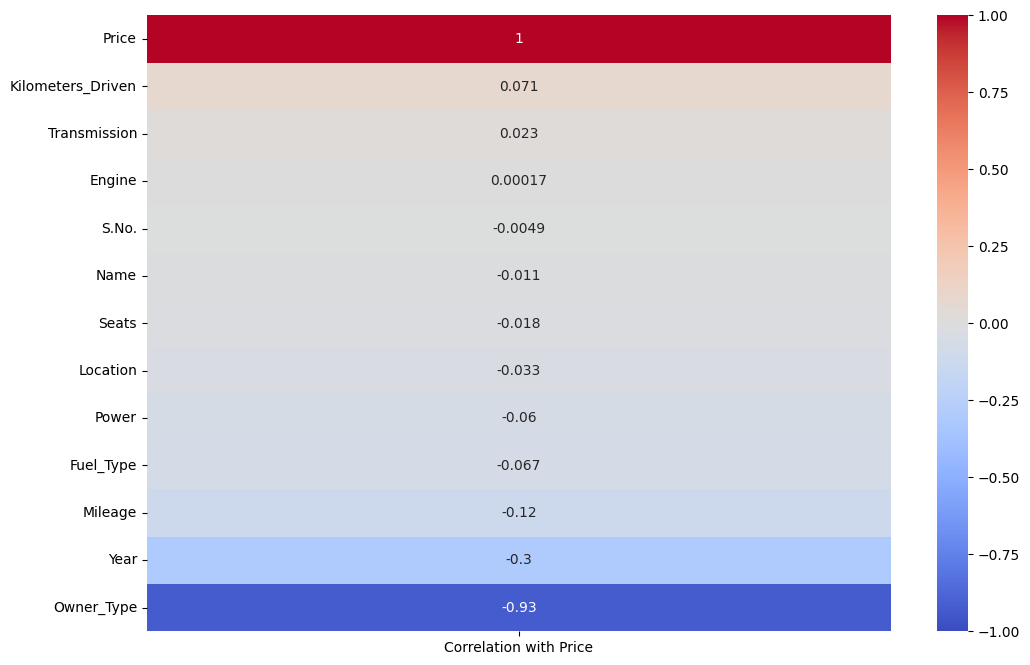

In [21]:
plt.figure(figsize=(12,8))

corr_with_price = corr_matrix["Price"].sort_values(ascending=False)
corr_with_price_df = corr_with_price.to_frame(name="Correlation with Price")
sns.heatmap(corr_with_price_df, annot=True, cmap="coolwarm", vmin=-1, vmax=1)


Spliting Data

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [23]:
x=df.drop(columns="Price")
y=df["Price"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [25]:
y_pred=model.predict(X_test)

In [26]:
mean_square=mean_squared_error(y_test,y_pred)
mean_absolute=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [27]:
df2=pd.DataFrame({"mean_square":[mean_square],"mean_absolute":[mean_absolute],"r2":[r2]})
df2

,mean_square,mean_absolute,r2
0,46.346624,3.829981,0.52195


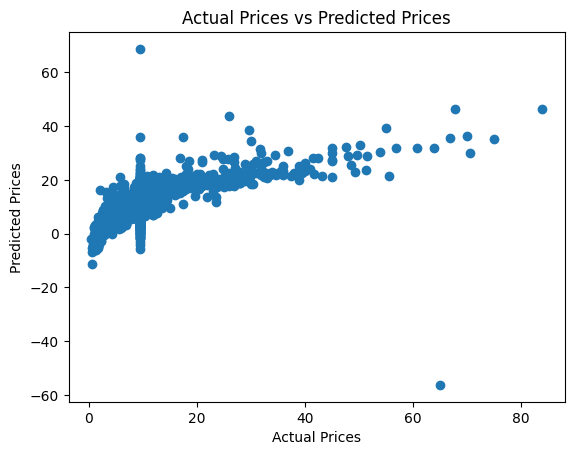

In [28]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [29]:
from sklearn.preprocessing import PolynomialFeatures


In [39]:
poly=PolynomialFeatures(degree=5)
x_poly=poly.fit_transform(x)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)


In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_pred2=model.predict(X_test)

In [ ]:
mean_square=mean_squared_error(y_test,y_pred2)
mean_absolute=mean_absolute_error(y_test,y_pred2)
r2=r2_score(y_test,y_pred2)

In [35]:
df3=pd.DataFrame({"mean_square":[mean_square],"mean_absolute":[mean_absolute],"r2":[r2]})
df3

,mean_square,mean_absolute,r2
0,1212.07521,3.653205,-11.502163
